## <center> Machine Learning from Scratch at ETH Zurich
## <center> 3. K Nearest Neighbors & K-Means
## <center> 监督学习：KNN用于分类与回归 & 无监督学习：K-Means用于聚类及其优化
### <center> Zhaorui Gong &nbsp; 宫兆瑞

### 3.1 KNN for classification
评价: KNN doesn't build an explicit model during training. Instead, it stores the training data and makes predictions only at test time.

作为最简单的分类算法，KNN计算每个testing datapoint与Training Data中每一个点的距离，选出最近的k个，根据这k个点的类别进行判断by majority vote. 它很直观，在数据集小、维度低时表现良好，而且自动处理多类别分类。但相对的，KNN对testing data中的异常值很敏感，且在高维数据、大规模数据中表现不好。

When It Works Best:

The decision boundary is irregular or non-linear.

There's a good distance metric and features are properly normalized or scaled.

The dataset isn't too large.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random as rd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
class KNN_classify():
    def __init__(self, k = 5):
        self.k = k
        self.X_train = None
        self.y_train = None
        

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        y_predict = [self.single_predict(x) for x in X_test]
        return np.array(y_predict)

    def single_predict(self, x):
        # compute the distance between x (the new point) and each point in the training set, with euclidean distance
        euclidean_dist = [np.linalg.norm(x-x_train) for x_train in self.X_train]  # x-x_train 得到新的向量，我们求它的模长
        # sort the distance and return the indices of the first k neighbors
        dist_indices = np.argsort(euclidean_dist)[:self.k]  # argsort() 返回的是从小到大的indices,注意是距离向量的indices
        # extract the labels of the k nearest neighbor
        k_labels = [self.y_train[i] for i in dist_indices]
        # return the most common class label among the k neighbors
        most_common_category = np.bincount(k_labels).argmax()  # bincount() 统计每个标签出现的次数，argmax() 返回出现次数最多的标签
        return most_common_category

In [3]:
### to understand the functions used above:
arr1 = np.array([1,0,4,1,2,5,1,0,1,2,1,5,2])
print(np.bincount(arr1))
print(np.bincount(np.arange(5)).size)
print(np.bincount(arr1).argmax())
print(np.argsort(arr1))

[2 5 3 0 1 2]
5
1
[ 1  7  3  0  6  8 10  4  9 12  2  5 11]


Next, we import a real dataset to test out KNN model

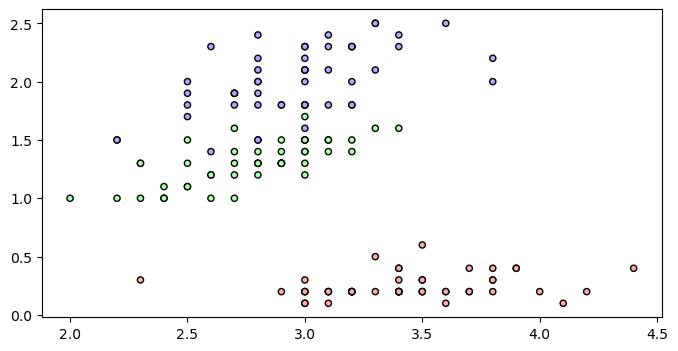

predicted y: [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]
accuracy: 1.0
confusion matrix:
 [[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [4]:
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 200)

plt.figure(figsize=(8, 4))
plt.scatter(X[:,1], X[:, 3], c=y, cmap=cmap, edgecolors = 'k', s=20)  # X 的columns 0:4随便换，作图需要二维，但prediction1全都用
plt.show()

model = KNN_classify(5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("predicted y:", y_predict)
print("accuracy:", accuracy_score(y_test, y_predict))
print("confusion matrix:\n", confusion_matrix(y_test, y_predict))
print("classification report:\n", classification_report(y_test, y_predict))


## 3.2 KNN for Regression

思路：一种简单的非参数回归，选取input周围距离最近的K个点，取他们的平均值作为新预测的点。优点是易于解释、适用于小数据集，但缺点是算力需求大，因为每个test数据点都需要与所有train点计算距离。且需要平均，在数据集大、异常值多时表现不好。

In [5]:
import numpy as np
import matplotlib.pyplot as plt



class KNN_Regressor():
    def __init__(self, K = 5):
        self.K = K
        self.X_train = None
        self.y_train = None
        self.predictions = []

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train


    def predict(self, X_test):
        for x_test in X_test:
            euclidean_dist = [np.linalg.norm(x_test- x_train) for x_train in self.X_train]
            indx = np.argsort(euclidean_dist)[:self.K]
            y_hat = np.mean(y_train[indx])
            self.predictions.append(y_hat)
        return np.array(self.predictions)
    

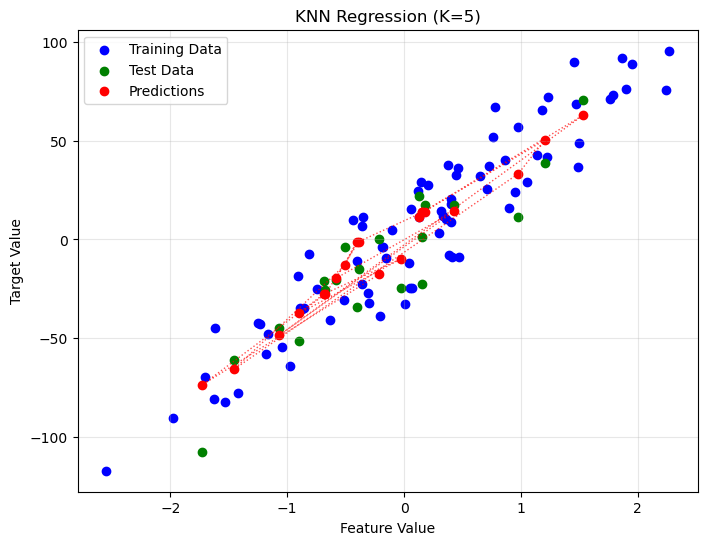

In [7]:
# Generate synthetic regression data
np.random.seed(0)
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=15)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=201)

# Initialize and fit the model
knn_regressor = KNN_Regressor(K=5)
knn_regressor.fit(X_train, y_train)

# Predict using the model
y_pred = knn_regressor.predict(X_test)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.scatter(X_test, y_pred, color='red', label='Predictions')
plt.plot(X_test, y_pred, color='red', linestyle='dotted', linewidth=1, alpha=0.7)
plt.title('KNN Regression (K=5)')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 3.3 K-Means Clustering

K-means 是一种经典的无监督学习算法，用于将数据点划分为 K 个不同的簇（clusters）。其核心思想是：

将数据点分配到最近的簇中心（质心）。质心的初始化很重要，可以是随机的。

通过迭代优化，向簇中加入点并且更新质心，使得每个数据点到其所属簇中心的距离平方和最小化。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class K_Means():
    def __init__(self, K=2, tol=1e-3, max_iter=100):
        self.K = K
        self.tol = tol
        self.max_iter = max_iter
        self.centers = {}  # 质心
        self.classes = {}  # 簇分配

    def euclidean_dist(self, x1, x2):
        return np.linalg.norm(x1 - x2, axis=1 if x1.ndim > 1 else None)

    def fit(self, X_train):
        # 随机初始化质心
        random_indices = np.random.choice(X_train.shape[0], self.K, replace=False)
        self.centers = {i: X_train[idx] for i, idx in enumerate(random_indices)}  # idx是random_indices的元素，i才是字典的索引(key)

        for t in range(self.max_iter):
            # 分配步骤：清空簇
            self.classes = {i: [] for i in range(self.K)}
            
            # 1. 分配步骤：计算每个点到所有质心的距离，并分配
            for x in X_train:
                distances = [self.euclidean_dist(x, self.centers[idx]) for idx in self.centers]
                clu_index = np.argmin(distances)
                self.classes[clu_index].append(x)

            
            old_centers = dict(self.centers) # 保存旧质心以检查收敛

            # 2. 更新步骤：重新计算质心
            for clu_index in self.classes:
                if self.classes[clu_index]:  # 避免空簇，应该是一个包含x_i的列表
                    self.centers[clu_index] = np.mean(self.classes[clu_index], axis=0)

            # 检查收敛（所有质心变化小于tol，避免因单个质心波动小导致提前终止）
            converged = all(
                np.linalg.norm(old_centers[clu_index] - self.centers[clu_index]) < self.tol
                for clu_index in self.centers
            )
        
            if converged:
                print(f"Converged at iteration {t + 1}")  # 输出实际迭代次数
                break
        
        else:  # for-else语法：一直不触发break时执行
            print(f"Reached max iterations {self.max_iter}")


    def predict(self, X_test):
        distances = np.array([[self.euclidean_dist(x, self.centers[idx]) for idx in self.centers] for x in X_test])
        return np.argmin(distances, axis=1)



接下来用不同的数据集测试我们的K-means算法。首先是线性可分的、服从高斯分布（圆，协方差矩阵对角）的二维数据集

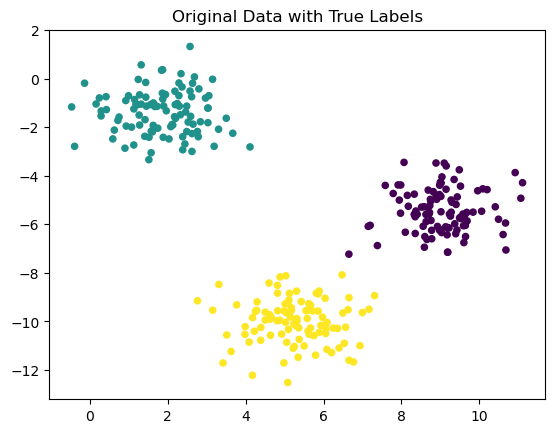

Converged at iteration 4


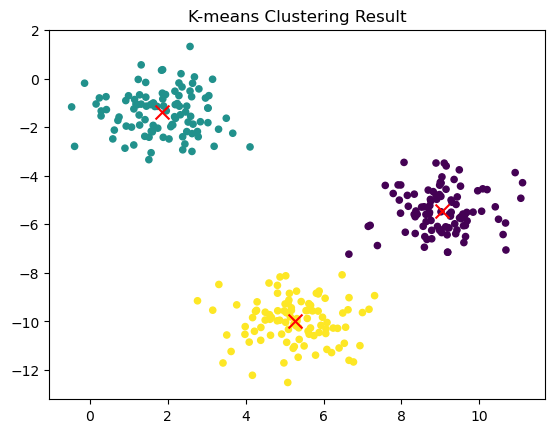

In [23]:
from sklearn.datasets import make_blobs

# 生成高斯分布的数据点，线性可分
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.9, random_state=200)

# 可视化原始数据
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=20)
plt.title("Original Data with True Labels")
plt.show()

# 初始化并训练模型
kmeans = K_Means(K=3, max_iter=100)
kmeans.fit(X)

# 预测簇标签
predicted_labels = kmeans.predict(X)

# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=20)
for center in kmeans.centers.values():
    plt.scatter(center[0], center[1], c='red', marker='x', s=100)  # 标记质心
plt.title("K-means Clustering Result")
plt.show()

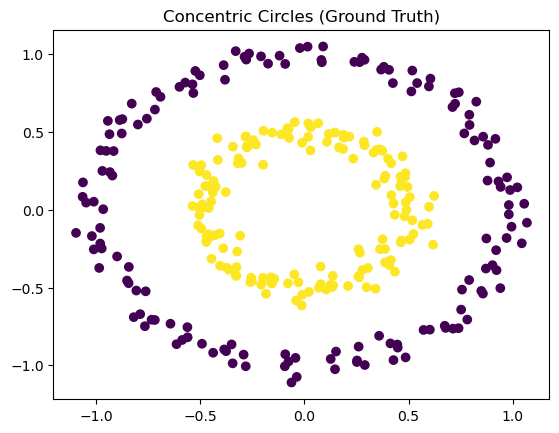

Converged at iteration 7


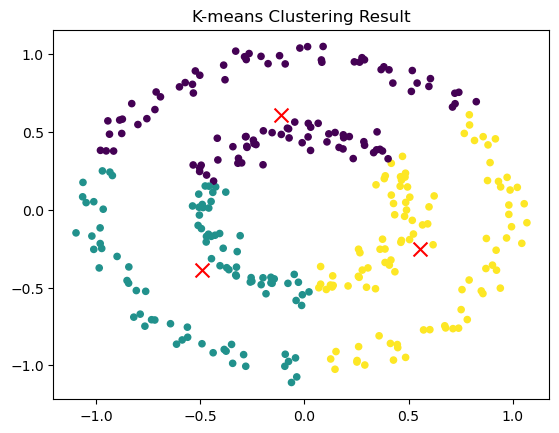

In [61]:
from sklearn.datasets import make_circles

# 生成同心圆数据
X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=200)
X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Concentric Circles (Ground Truth)")
plt.show()


# K-means聚类
kmeans = K_Means(K = 3, max_iter = 100)
kmeans.fit(X)
predicted_labels = kmeans.predict(X)

# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=20)
for center in kmeans.centers.values():
    plt.scatter(center[0], center[1], c='red', marker='x', s=100)  # 标记质心
plt.title("K-means Clustering Result")
plt.show()

# 甚至每次运行由于随机种子不同，K-Means的结果也不同

K-means 的目标是最小化欧氏距离平方和，其隐含假设包括：

各向同性方差：假设所有簇的方差是相同的，多元高斯的spherical，协方差为对角矩阵且对角sigma_j^2相同。所有方向的方差相同使得所有聚类（簇）是球形的，只是每个簇的方差可以不同。

均匀先验：所有簇的权重（先验概率）相同。详见GMM。

接下来，我们打破这些假设，直接用GMM的数据：

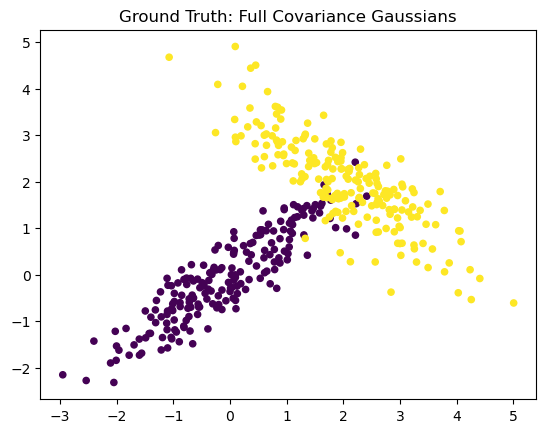

In [63]:
from scipy.stats import multivariate_normal

# 定义两个簇的均值和协方差矩阵（任意协方差）
means = [[0, 0], [2, 2]]
covs = [
    [[1, 0.9], [0.9, 1]],   # 簇0：相关性强的椭圆 (注意协方差矩阵必须是半正定的！)
    [[1, -0.8], [-0.8, 1]]  # 簇1：负相关的椭圆
]

# 生成数据
X = np.vstack([
    multivariate_normal(means[0], covs[0]).rvs(200),
    multivariate_normal(means[1], covs[1]).rvs(200)
])
y = np.array([0] * 200 + [1] * 200)  # 真实标签

# 可视化真实分布
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s = 20)
plt.title("Ground Truth: Full Covariance Gaussians")
plt.show()

K-means 会按欧氏距离划分，无法捕捉椭圆的旋转方向，导致簇边界错误。

Converged at iteration 7


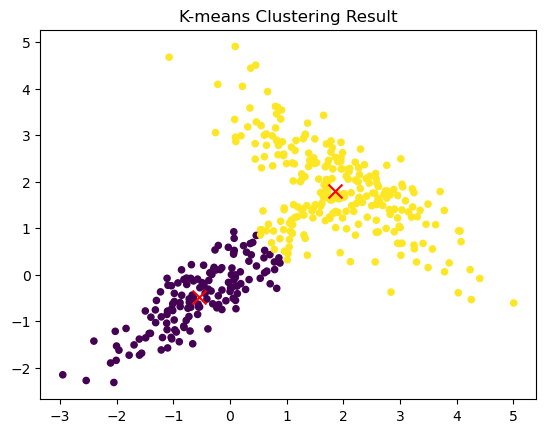

In [64]:
# K-means聚类
kmeans = K_Means(K = 2, max_iter = 100)
kmeans.fit(X)
predicted_labels = kmeans.predict(X)

# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=20)
for center in kmeans.centers.values():
    plt.scatter(center[0], center[1], c='red', marker='x', s=100)  # 标记质心
plt.title("K-means Clustering Result")
plt.show()

## 3.4 K-Means++
K-means++ 是 K-means 的改进版本，主要区别在于 初始质心的选择策略。普通 K-means 随机选择初始质心，容易导致算法陷入局部最优，而 K-means++ 通过概率化的方法选择初始质心，使得初始质心尽可能分散，从而提高聚类效果和收敛速度。

第一步：随机选择第一个质心。

迭代步：对于每一个数据点，计算它与当前所有质心中的最短欧氏距离平方 D(x)^2（即与最近质心的距离）。按照 D(x)^2 / ∑ D(x)^2 的概率选择下一个质心（距离越大的点，被选中的概率越高）。重复直到选出 KK 个质心。

In [ ]:
class K_Means():   # 沿用K-Means聚类的基础，新增一个K-Means++函数
    def __init__(self, K=2, tol=1e-3, max_iter=100, init_method='random'):
        self.K = K
        self.tol = tol
        self.max_iter = max_iter
        self.init_method = init_method  # 'random' 或 'kmeans++'
        self.centers = {}  # 质心
        self.classes = {}  # 簇分配

    def euclidean_dist(self, x1, x2):
        return np.linalg.norm(x1 - x2, axis=1 if x1.ndim > 1 else None)

    def _kmeans_plus_plus_init(self, X_train):
        """K-means++ 初始化质心"""
        centers = []
        # 1. 随机选择第一个质心
        first_idx = np.random.choice(X_train.shape[0])
        centers.append(X_train[first_idx])

        # 2. 选择剩下的 K-1 个质心
        for _ in range(1, self.K):
            # 计算每个点到最近已选质心的距离平方
            distances = np.array([min([self.euclidean_dist(x, c)**2 for c in centers]) for x in X_train])
            # 按概率选择下一个质心
            prob = distances / distances.sum()
            next_idx = np.random.choice(X_train.shape[0], p=prob)   # 距离越远概率越大
            centers.append(X_train[next_idx])

        # 转换为字典格式 {0: center0, 1: center1, ...}
        self.centers = {i: centers[i] for i in range(self.K)}

    def fit(self, X_train):
        # 初始化质心
        if self.init_method == 'kmeans++':
            self._kmeans_plus_plus_init(X_train)
        else:  # 默认随机初始化
            random_indices = np.random.choice(X_train.shape[0], self.K, replace=False)
            self.centers = {i: X_train[idx] for i, idx in enumerate(random_indices)}

        for t in range(self.max_iter):
            # 分配步骤：清空簇
            self.classes = {i: [] for i in range(self.K)}
            
            # 1. 分配步骤：计算每个点到所有质心的距离，并分配
            for x in X_train:
                distances = [self.euclidean_dist(x, self.centers[idx]) for idx in self.centers]
                clu_index = np.argmin(distances)
                self.classes[clu_index].append(x)

            old_centers = dict(self.centers)  # 保存旧质心以检查收敛

            # 2. 更新步骤：重新计算质心
            for clu_index in self.classes:
                if self.classes[clu_index]:  # 避免空簇
                    self.centers[clu_index] = np.mean(self.classes[clu_index], axis=0)

            # 检查收敛（所有质心变化小于tol）
            converged = all(
                np.linalg.norm(old_centers[clu_index] - self.centers[clu_index]) < self.tol
                for clu_index in self.centers
            )
        
            if converged:
                print(f"Converged at iteration {t + 1}")
                break
        
        else:  # for-else语法：未触发break时执行
            print(f"Reached max iterations {self.max_iter}")

    def predict(self, X_test):
        distances = np.array([[self.euclidean_dist(x, self.centers[idx]) for idx in self.centers] for x in X_test])
        return np.argmin(distances, axis=1)

测试 K-means++ 的效果。生成数据（非均匀簇）

Converged at iteration 12
Converged at iteration 4


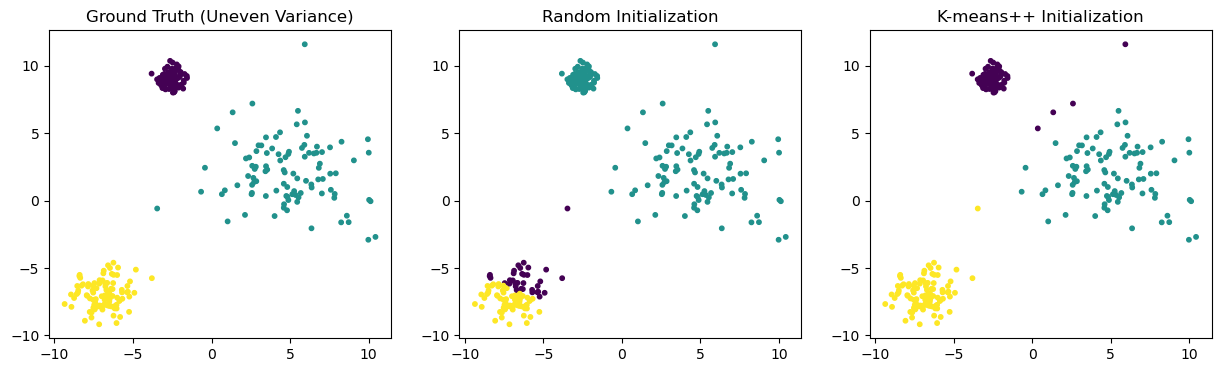

In [85]:
# 生成非均匀方差的数据
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[0.5, 2.5, 1], random_state=42)

# 普通 K-means
kmeans_random = K_Means(K=3, init_method='random')
kmeans_random.fit(X)
preds_random = kmeans_random.predict(X)

# K-means++
kmeans_plus = K_Means(K=3, init_method='kmeans++')
kmeans_plus.fit(X)
preds_plus = kmeans_plus.predict(X)

# 可视化对比
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 4))
ax0.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
ax0.set_title("Ground Truth (Uneven Variance)")
ax1.scatter(X[:, 0], X[:, 1], c=preds_random, cmap='viridis', s = 10)
ax1.set_title("Random Initialization")
ax2.scatter(X[:, 0], X[:, 1], c=preds_plus, cmap='viridis', s=10)
ax2.set_title("K-means++ Initialization")
plt.show()